In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../src")

In [3]:
from gensim.models import KeyedVectors
from fluidvec import create_fluid_keyvec, VocabSet

In [4]:
vs = VocabSet.load()
wvocab = vs.word_vocab

In [84]:
fkv = create_fluid_keyvec("../data/model/fluidvec-char.b.1")
fkv

device:  cpu
n_neg_sample:  5


<FluidKeyedVectors: 217350 words, 20396 chars, 100 dimensions>

In [85]:
fkv.most_similar("/社.")

[('.構/', 0.792674720287323),
 ('.育/', 0.789618194103241),
 ('.治/', 0.7849011421203613),
 ('.識/', 0.781531035900116),
 ('.範/', 0.7783615589141846),
 ('.值.', 0.7776779532432556),
 ('/族.', 0.7772347331047058),
 ('.化/', 0.7738292813301086),
 ('/基.', 0.7681733965873718),
 ('.庭/', 0.7672065496444702)]

In [86]:
fkv.most_similar("/社.", word_only=True)

[('上流', 0.17624442279338837, 50),
 ('父權', 0.16222922503948212, 177),
 ('福利', 0.13845762610435486, 655),
 ('敗壞', 0.12076283991336823, 48),
 ('現代', 0.11712218821048737, 1922),
 ('倫理', 0.11614448577165604, 350),
 ('乃至', 0.11545934528112411, 284),
 ('人文', 0.11427304893732071, 680),
 ('社會', 0.1116725280880928, 9691),
 ('資訊化', 0.11112893372774124, 73)]

In [87]:
fkv.most_similar("社會", use_char_vec=True, word_only=True)

in word vocab:  True
char tokens:  ['/社.', '.會/']


[('暨', 0.08486597239971161, 334),
 ('福利', 0.08303382247686386, 655),
 ('文教', 0.05939400941133499, 220),
 ('促進會', 0.05522868037223816, 68),
 ('文化', 0.05042145401239395, 6565),
 ('與', 0.047655247151851654, 42852),
 ('基金會', 0.04450756311416626, 1110),
 ('上流', 0.0418526865541935, 50),
 ('鄒族', 0.0416993722319603, 48),
 ('婦女', 0.03832096979022026, 1822)]

In [88]:
fkv.most_similar("驢肉", use_char_vec=True, word_only=True)

in word vocab:  False
char tokens:  ['/驢.', '.肉/']


[('牛肉', 0.1485476791858673, 133),
 ('汁', 0.1424451470375061, 70),
 ('魚肉', 0.1390373706817627, 54),
 ('鹽', 0.13313132524490356, 161),
 ('鳳梨', 0.11642277240753174, 38),
 ('燉', 0.11438897997140884, 55),
 ('奶油', 0.11043530702590942, 81),
 ('少許', 0.10554607212543488, 78),
 ('肉質', 0.10452785342931747, 41),
 ('木瓜', 0.10073314607143402, 37)]

In [89]:
fkv.most_similar("語奧", use_char_vec=True, word_only=True)

in word vocab:  False
char tokens:  ['/語.', '.奧/']


[('符號', 0.08971244841814041, 431),
 ('—', 0.07481905072927475, 18),
 ('語言', 0.06726217269897461, 2204),
 ('和', 0.06528167426586151, 35974),
 ('及', 0.048538051545619965, 25433),
 ('與', 0.04641526937484741, 42852),
 ('幾何', 0.02566775679588318, 130),
 ('轉換成', 0.02523135393857956, 83),
 ('文字', 0.023704735562205315, 1173),
 ('源自', 0.02110547386109829, 104)]

In [ ]:
fkv.most_similar("語奧", use_char_vec=True, word_only=True)

In [105]:
fkv.most_similar("車", use_char_vec=True, word_only=True)

in word vocab:  False
char tokens:  ['/鼠.', '.車/']


[('機車', 0.19752159714698792, 618),
 ('轎車', 0.1585056483745575, 151),
 ('搭', 0.1570584625005722, 520),
 ('輛', 0.14658498764038086, 612),
 ('汽車', 0.14584365487098694, 1060),
 ('駕駛', 0.14223100244998932, 225),
 ('車', 0.1281992346048355, 1686),
 ('自行車', 0.12665173411369324, 92),
 ('巴士', 0.12636211514472961, 184),
 ('搭乘', 0.12316432595252991, 263)]

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(2)

In [10]:
import numpy as np
vec = fkv.vectors
norms = np.linalg.norm(vec, axis=1)
norm_vec = vec / norms[:, np.newaxis]
proj = pca.fit_transform(norm_vec)


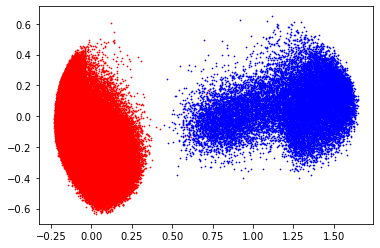

In [11]:
from matplotlib import pyplot as plt
plt.scatter(proj[:fkv.n_word, 0], proj[:fkv.n_word, 1], c='red', s=0.5)
plt.scatter(proj[fkv.n_word:, 0], proj[fkv.n_word:, 1], c='blue', s=0.5)

In [89]:
np.random.choice([fkv.index_to_key[x+fkv.n_word] for x in np.where(proj[fkv.n_word:, 1]>.3)[0]], 50)

array(['.墨/', '.辯/', '/油.', '/杜.', '/父.', '/歧.', '.Y/', '.季/', '.勇/',
       '.戰.', '.衡/', '/鄉/', '/裝.', '/練/', '.光/', '.訂/', '/候.', '.瘓/',
       '.里/', '/釋.', '/竊.', '.復.', '.涉/', '.顧.', '/承.', '.周.', '/千.',
       '/蓋.', '.歉/', '.必/', '.E.', '/勞.', '.瘤/', '/是.', '/人/', '/松.',
       '/俄.', '/女/', '.耳.', '.祝/', '.O.', '/德.', '/知/', '.巴.', '.襯/',
       '/埋.', '.坪/', '/拒/', '.段/', '.晶/'], dtype='<U7')

In [78]:
np.random.choice([fkv.index_to_key[x] for x in np.where(proj[:fkv.n_word, 0]>0)[0]], 20)

array(['貴族氣', '劍影', '冰場', '傳引到', '婁家', '畫起來', '英日語科', '馬特拉掉', '荷蘭豆', '安適',
       '巢箱', '副部長', '顫巍巍', '擊球點', '２５９', '電物系', '（４６）', '中文詞', '槍毒案',
       '馬佑君'], dtype='<U152')